<a href="https://colab.research.google.com/github/capGoblin/NN_from_Scratch/blob/main/MNIST_Neural_Network_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
!unzip train.csv.zip

Archive:  train.csv.zip
  inflating: train.csv               


In [ ]:
data = pd.read_csv('train.csv')

In [ ]:
pd.DataFrame(data)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data = np.array(data)
np.random.shuffle(data)
m, n = data.shape

In [ ]:
data_train = data[1000:m+1].T
X_train = data_train[1:n] / 255
y_train = data_train[0]

data_test = data[0:1000].T
X_test = data_test[1:n] / 255
y_test = data_test[0]

In [ ]:
pd.DataFrame(y_train)

,0
0,5
1,8
2,7
3,3
4,6
...,...
40995,2
40996,0
40997,5
40998,8


In [ ]:
def init_params():
    w1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    w2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return w1, b1, w2, b2

def ReLU(Z):
  return np.maximum(Z, 0)

def softmax(Z):
   return np.exp(Z) / sum(np.exp(Z))

def forward_prop(w1, b1, w2, b2, X):
    Z1 = w1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = w2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
  return Z > 0


# def one_hot(Y):
#     one_hot_Y = np.zeros((Y.size, Y.max() + 1))
#     one_hot_Y[np.arange(Y.size), Y] = 1
#     one_hot_Y = one_hot_Y.T
#     return one_hot_Y


def one_hot(Y):
  num_classes = Y.max() + 1
  one_hot_Y = np.zeros((num_classes, Y.size))
  for i, y in enumerate(Y):
    one_hot_Y[y, i] = 1
  return one_hot_Y



def backward_prop(Z1, A1, Z2, A2, w1, w2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dw2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)

    dZ1 = w2.T.dot(dZ2) * ReLU_deriv(Z1)
    dw1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dw1, db1, dw2, db2

def update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha):
  w1 = w1 - alpha * dw1
  b1 = b1 - alpha * db1
  w2 = w2 - alpha * dw2
  b2 = b2 - alpha * db2
  return w1, b1, w2, b2

In [ ]:
def get_predictions(A2):
  return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
  print(predictions, Y)
  return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
  w1, b1, w2, b2 = init_params()
  for i in range(iterations):
    Z1, A1, Z2, A2 = forward_prop(w1, b1, w2, b2, X)
    dw1, db1, dw2, db2 = backward_prop(Z1, A1, Z2, A2, w1, w2, X, Y)
    w1, b1, w2, b2 = update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha)
    if i % 10 == 0:
      print("iterations: ", i)
      predictions = get_predictions(A2)
      print(get_accuracy(predictions, Y))
  return w1, b1, w2, b2

In [ ]:
print("Shape of X_train:", X_train.shape)
# print("Shape of w1:", w1.shape)


Shape of X_train: (784, 41000)


In [ ]:
w1, b1, w2, b2 = gradient_descent(X_train, y_train, 0.10, 500)

iterations:  0
[5 5 5 ... 5 5 1] [5 8 7 ... 5 8 1]
0.11773170731707316
iterations:  10
[8 4 1 ... 0 8 7] [5 8 7 ... 5 8 1]
0.17497560975609755
iterations:  20
[8 4 7 ... 0 8 1] [5 8 7 ... 5 8 1]
0.2623658536585366
iterations:  30
[8 4 7 ... 5 8 1] [5 8 7 ... 5 8 1]
0.33239024390243904
iterations:  40
[8 4 7 ... 5 8 1] [5 8 7 ... 5 8 1]
0.39675609756097563
iterations:  50
[8 4 7 ... 5 8 1] [5 8 7 ... 5 8 1]
0.4494878048780488
iterations:  60
[8 4 7 ... 5 8 1] [5 8 7 ... 5 8 1]
0.5009756097560976
iterations:  70
[5 4 7 ... 5 8 1] [5 8 7 ... 5 8 1]
0.5495121951219513
iterations:  80
[5 4 7 ... 5 8 1] [5 8 7 ... 5 8 1]
0.591
iterations:  90
[5 4 7 ... 5 8 1] [5 8 7 ... 5 8 1]
0.6270975609756098
iterations:  100
[5 4 7 ... 5 8 1] [5 8 7 ... 5 8 1]
0.656390243902439
iterations:  110
[5 4 7 ... 5 8 1] [5 8 7 ... 5 8 1]
0.6797804878048781
iterations:  120
[5 4 7 ... 5 8 1] [5 8 7 ... 5 8 1]
0.6983170731707317
iterations:  130
[5 9 7 ... 5 8 1] [5 8 7 ... 5 8 1]
0.7126341463414634
iterations:  

In [ ]:
def make_predictions(X, w1, b1, w2, b2):
  _, _, _, A2 = forward_prop(w1, b1, w2, b2, X)
  predictions = get_predictions(A2)
  print(type(predictions))
  return predictions

def test_prediction(index, w1, b1, w2, b2):
    current_image = X_train[:, index]
    prediction = make_predictions(X_train[:, index], w1, b1, w2, b2)
    label = y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

In [ ]:
test_predictions = make_predictions(X_test, w1, b1, w2, b2)
get_accuracy(test_predictions, y_test)

<class 'numpy.ndarray'>
[1 0 6 7 4 2 4 0 9 7 7 8 7 5 6 4 7 5 8 2 4 5 7 6 4 9 5 6 0 6 1 2 5 4 2 6 9
 9 4 0 8 7 1 3 1 0 4 4 2 0 0 1 1 4 7 7 2 2 9 0 4 2 0 3 9 0 9 4 6 5 5 3 9 2
 3 4 7 3 4 5 9 7 6 5 5 7 6 2 4 6 3 1 7 8 8 3 4 8 2 2 7 9 3 1 3 1 2 7 2 0 3
 3 5 8 7 4 4 8 0 7 8 8 9 3 4 7 4 3 7 0 7 2 4 8 9 8 0 7 5 5 3 0 6 6 6 0 9 5
 9 3 8 8 7 8 5 7 4 9 0 8 1 1 8 1 6 8 4 1 1 1 2 9 9 5 1 6 0 7 1 1 3 7 6 8 1
 6 0 6 3 5 2 6 2 1 8 3 6 1 2 2 7 5 4 1 9 3 5 7 8 0 6 7 5 4 8 1 7 0 6 4 9 1
 0 9 2 8 6 9 9 7 1 1 3 9 0 4 3 7 2 6 1 8 2 9 9 8 9 5 6 0 2 9 1 6 3 8 4 6 2
 1 2 5 3 7 1 0 4 5 4 7 1 6 5 4 9 7 6 1 4 7 3 6 6 0 7 4 3 1 5 0 7 2 3 2 4 9
 8 6 8 3 5 0 1 9 0 3 3 8 3 9 9 0 7 9 8 7 5 0 1 3 2 1 6 4 1 8 3 7 9 7 3 0 3
 0 5 5 8 7 3 1 6 0 7 3 2 8 9 5 2 1 9 5 5 0 2 7 7 9 7 6 0 9 2 0 0 1 2 5 7 8
 6 8 1 1 5 7 6 1 7 4 4 6 9 8 3 7 6 5 8 6 9 3 4 0 4 3 0 8 8 8 6 8 3 7 7 4 1
 1 0 6 2 1 2 6 3 2 2 2 1 3 7 0 4 1 4 5 5 9 0 8 0 4 8 8 4 7 6 4 0 7 3 4 3 8
 0 9 4 1 4 2 8 3 2 5 2 3 7 3 4 3 1 9 3 5 5 4 4 7 6 1 4 5 2 4 6 9 8 4 3 1 7
 

0.839

<class 'numpy.ndarray'>
Prediction:  [5 5 2 5 5 5 5 5 5 2]
Label:  5


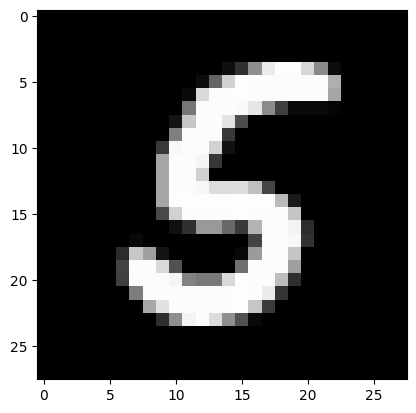

<class 'numpy.ndarray'>
Prediction:  [2 5 2 5 2 5 5 5 5 5]
Label:  8


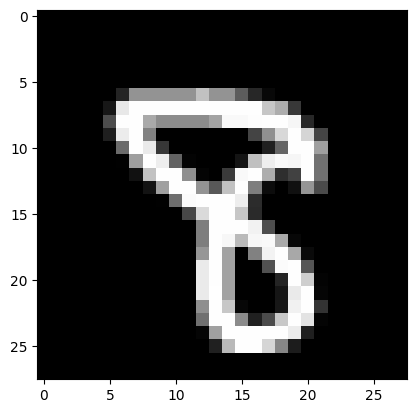

<class 'numpy.ndarray'>
Prediction:  [5 5 5 5 5 2 5 5 5 5]
Label:  7


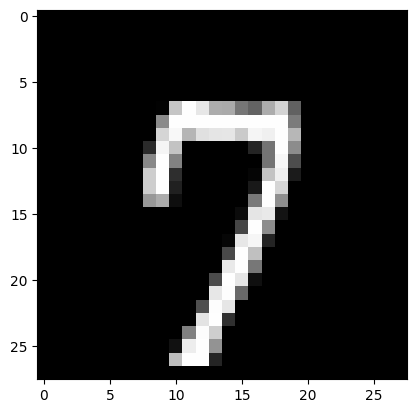

<class 'numpy.ndarray'>
Prediction:  [5 5 2 5 5 5 5 2 5 2]
Label:  3


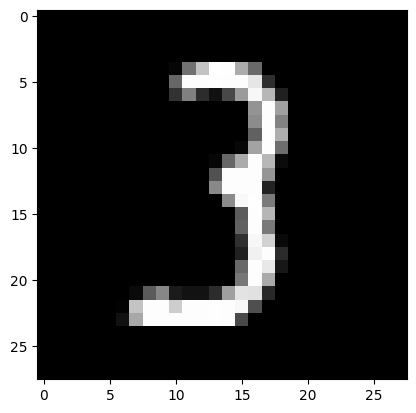

In [ ]:
test_prediction(0, w1, b1, w2, b2)
test_prediction(1, w1, b1, w2, b2)
test_prediction(2, w1, b1, w2, b2)
test_prediction(3, w1, b1, w2, b2)